<a href="https://colab.research.google.com/github/vijaynadimpalli/FinancialDataSentimentAnalysis/blob/main/FianancialDataSentimentAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Diffrence with 1 is here sentences are combined row wise... i.e each row has only one sentence....

In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/drive/My Drive/NEW_DATASCIENCE_PROJECTS/DATA&READING MATERIALS/RedditFinanceNewstop25.zip')
zip.extractall()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Combined_News_DJIA.csv")

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [ ]:
top_starters = df.apply(lambda x:x['Top1'][0:2] ,axis=1).value_counts()[0:2].index.values
top_starters

array(["b'", 'b"'], dtype=object)

In [ ]:
#df['Top1'][df['Top1'].apply(lambda x: x[0:2] in top_starters)].apply(lambda x:x[-1:]).unique()

In [ ]:
#df['Top1'].apply(lambda x: x[2:-1] if  x[0:2] in top_starters else x)

In [ ]:
#trying to remove the quotations and b' in sentences
for col in df.columns[2:].values:
  #print(col)
  df[col] = df[col].astype('str').apply(lambda x: x[2:-1].lower() if  x[0:2] in top_starters else x.lower())

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,georgia 'downs two russian warplanes' as count...,breaking: musharraf to be impeached.,russia today: columns of troops roll into sout...,russian tanks are moving towards the capital o...,"afghan children raped with 'impunity,' u.n. of...",150 russian tanks have entered south ossetia w...,"breaking: georgia invades south ossetia, russi...",the 'enemy combatent' trials are nothing but a...,georgian troops retreat from s. osettain capit...,did the u.s. prep georgia for war with russia?,rice gives green light for israel to attack ir...,announcing:class action lawsuit on behalf of a...,so---russia and georgia are at war and the nyt...,china tells bush to stay out of other countrie...,did world war iii start today?,georgia invades south ossetia - if russia gets...,al-qaeda faces islamist backlash,"condoleezza rice: ""the us would not act to pre...",this is a busy day: the european union has ap...,"georgia will withdraw 1,000 soldiers from iraq...",why the pentagon thinks attacking iran is a ba...,caucasus in crisis: georgia invades south ossetia,indian shoe manufactory - and again in a seri...,visitors suffering from mental illnesses banne...,no help for mexico's kidnapping surge
1,2008-08-11,1,why wont america and nato help us? if they won...,bush puts foot down on georgian conflict,jewish georgian minister: thanks to israeli tr...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks 'faked',what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in s.ossetia blames...,welcome to world war iv! now in high definition!,"georgia's move, a mistake of monumental propor...",russia presses deeper into georgia; u.s. says ...,abhinav bindra wins first ever individual olym...,u.s. ship heads for arctic to define territory,drivers in a jerusalem taxi station threaten t...,the french team is stunned by phelps and the 4...,israel and the us behind the georgian aggression?,"""do not believe tv, neither russian nor georgi...",riots are still going on in montreal (canada) ...,china to overtake us as largest manufacturer,war in south ossetia [pics],israeli physicians group condemns state torture,russia has just beaten the united states over...,perhaps *the* question about the georgia - rus...,russia is so much better at war,so this is what it's come to: trading sex for ...
2,2008-08-12,0,remember that adorable 9-year-old who sang at ...,russia 'ends georgia operation',"""if we had no sexual harassment we would have ...",al-qa'eda is losing support in iraq because of...,ceasefire in georgia: putin outmaneuvers the west,why microsoft and intel tried to kill the xo $...,stratfor: the russo-georgian war and the balan...,i'm trying to get a sense of this whole georgi...,the us military was surprised by the timing an...,u.s. beats war drum as iran dumps the dollar,"gorbachev: ""georgian military attacked the sou...",cnn use footage of tskhinvali ruins to cover g...,beginning a war as the olympics were opening v...,55 pyramids as large as the luxor stacked into...,the 11 top party cities in the world,u.s. troops still in georgia (did you know the...,why russias response to georgia was right,"gorbachev accuses u.s. of making a ""serious bl...","russia, georgia, and nato: cold war two",remember that adorable 62-year-old who led you...,war in georgia: the israeli connection,all signs point to the us encouraging georgia ...,christopher king argues that the us and nato a...,america: the new mexico?,bbc news | asia-pacific | extinction 'by man n...
3,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,when the president ordered to attack tskhinval...,israel clears troops who killed reuters camer...,"britain\'s policy of being tough on drugs is ""...",body of 14 year old found in trunk;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


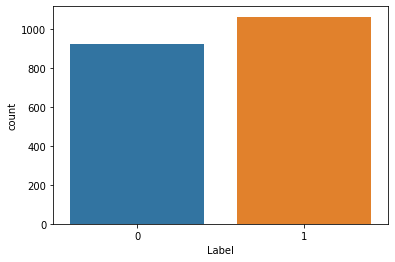

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Label'])

In [ ]:
#Tx (Cap of string length) = 50
import nltk
import string
nltk.download('punkt',download_dir='/usr/lib/nltk_data')
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/lib/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import os
if os.path.isfile('/content/glove.6B.zip')==False:
  !wget http://nlp.stanford.edu/data/glove.6B.zip

if os.path.isfile('/content/glove.6B.50d.txt')==False:
  zip = zipfile.ZipFile('/content/glove.6B.zip')
  zip.extractall()
  zip.close()

--2020-11-30 08:59:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-30 08:59:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-30 08:59:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import numpy as np
word_embeddings = {}
words = set()

with open('/content/glove.6B.50d.txt',mode='r') as f:
  for line in f:
    line = line.split()
    words.add(line[0])
    word_embeddings[line[0]] = line[1:]

index_to_word = {}
word_to_index = {}
for i,word in enumerate(sorted(words)):
  index_to_word[i+1] = word
  word_to_index[word] = i+1
#indices range from 1 to 400000

In [ ]:
max_sentence_length  = 800
def sent_to_indices(tokens,vocab):
  lr = np.zeros((1,max_sentence_length))
  for i,w in enumerate(tokens):
    w = w.translate(str.maketrans('','',string.punctuation))
    #str.maketrans creates a dict for translate to change characters...
    #print(w + " " + str(i))
    #if a word is not present in glove keep it as 0
    if w !='' and w in word_to_index and w not in stopwords.words('english'):
      vocab.add(w)
      lr[:,i] = word_to_index[w]
  return lr


def all_sent_indices(df,vocab):
  
  labels = np.zeros((df.shape[0],1))
  sentences = np.zeros((df.shape[0],max_sentence_length))
  i = 0
  #count_greater =  0

  for i,index in enumerate(df.index):
    labels[i] = df.loc[index]["Label"]
    tokens = []

    for col in df.columns[2:].values:
      tokens+=word_tokenize(df.loc[index][col])
    
    #count_greater = count_greater + 1 if len(tokens)>max_sentence_length else count_greater
    
    sentences[i] = sent_to_indices(tokens[:max_sentence_length],vocab)
  
  #print(count_greater)

  return sentences,labels

In [ ]:
vocab = set()
sentences,labels = all_sent_indices(df,vocab)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1591, 800)
(398, 800)
(1591, 1)
(398, 1)


In [ ]:
print("embedding length = " + str(len(word_embeddings['a'])))
print("data vocab size = " + str(len(vocab)))
print("Glove vocab size = " + str(len(word_embeddings)))
print(sentences.shape)
print(labels.shape)

embedding length = 50
data vocab size = 31831
Glove vocab size = 400000
(1989, 800)
(1989, 1)


In [ ]:
from keras.layers import Embedding

In [ ]:
def pretrained_embedder(word_to_index,word_embeddings):
  embed_dim = len(word_embeddings['a'])
  vocab_size_glove = len(word_embeddings)

  embed_matrix = np.zeros((vocab_size_glove+1,embed_dim))
  for word,i in word_to_index.items():
    embed_matrix[i,:] = word_embeddings[word]

  embedder = Embedding(input_dim=vocab_size_glove+1,output_dim=embed_dim,trainable=False)
  embedder.build((None,))
  embedder.set_weights([embed_matrix])

  return embedder

In [ ]:
#So input cleaning is done and created the embeddings... next we will create the model using functional api

In [ ]:
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.models import Model

In [ ]:
def model(sent_length,word_to_index,word_embeddings):

  X = Input(shape=(sent_length,),dtype='int32')
  e = pretrained_embedder(word_to_index,word_embeddings)(X)
  out = LSTM(128,return_sequences=False)(e)
  #out = LSTM(512,return_sequences=False)(out)
  output = Dense(units = 1,activation='sigmoid')(out)

  model =  Model(inputs=X,outputs=output)

  return model

In [ ]:
model = model(800,word_to_index,word_embeddings)
model.summary()
#number of parametrs are too high, made a mistake.... always put trainable=False in embedding layer otherwise your 
#trainable parametners will be really high which might impact performance...

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 800)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 800, 50)           20000050  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 20,091,827
Trainable params: 91,777
Non-trainable params: 20,000,050
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)
model.compile(loss = "binary_crossentropy",optimizer=adam,metrics=['accuracy'])
history =  model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

In [ ]:
import pandas as pd

output = pd.DataFrame(history.history)
output.plot()

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5,1,0)
y_pred
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
print(np.sum(y_test)/len(y_test))
print(np.sum(y_train)/len(y_train))